# Meeting07

## Unit19: Implementing the Classifier


In [2]:
import matplotlib
#matplotlib.use('Agg')
path_data = 'https://raw.githubusercontent.com/taecoding/data/master/cs61/data8assets/textbook/chapters/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

### Implementing the Classifier ###
We are now ready to implement a $k$-nearest neighbor classifier based on multiple attributes. We have used only two attributes so far, for ease of visualization. But usually predictions will be based on many attributes. Here is an example that shows how multiple attributes can be better than pairs.

### Banknote authentication

This time we'll look at predicting whether a banknote (e.g., a \$20 bill) is counterfeit or legitimate.  Researchers have put together a data set for us, based on photographs of many individual banknotes: some counterfeit, some legitimate.  They computed a few numbers from each image, using techniques that we won't worry about for this course.  So, for each banknote, we know a few numbers that were computed from a photograph of it as well as its class (whether it is counterfeit or not).  Let's load it into a table and take a look.

In [3]:
banknotes = Table.read_table(path_data + 'banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


Let's look at whether the first two numbers tell us anything about whether the banknote is counterfeit or not.  Here's a scatterplot:

In [4]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)

In [5]:
banknotes = banknotes.join('Class', color_table)

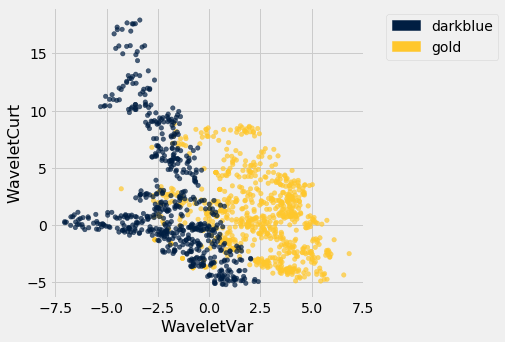

In [6]:
banknotes.scatter('WaveletVar', 'WaveletCurt', colors='Color')

Pretty interesting!  Those two measurements do seem helpful for predicting whether the banknote is counterfeit or not.  However, in this example you can now see that there is some overlap between the blue cluster and the gold cluster.  This indicates that there will be some images where it's hard to tell whether the banknote is legitimate based on just these two numbers.  Still, you could use a $k$-nearest neighbor classifier to predict the legitimacy of a banknote.

Take a minute and think it through: Suppose we used $k=11$ (say).  What parts of the plot would the classifier get right, and what parts would it make errors on?  What would the decision boundary look like?

The patterns that show up in the data can get pretty wild.  For instance, here's what we'd get if used a different pair of measurements from the images:

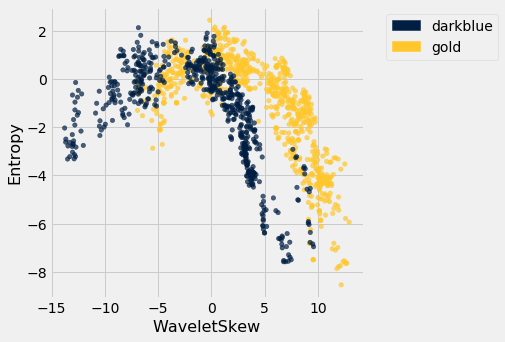

In [7]:
banknotes.scatter('WaveletSkew', 'Entropy', colors='Color')

There does seem to be a pattern, but it's a pretty complex one.  Nonetheless, the $k$-nearest neighbors classifier can still be used and will effectively "discover" patterns out of this.  This illustrates how powerful machine learning can be: it can effectively take advantage of even patterns that we would not have anticipated, or that we would have thought to "program into" the computer.

### Multiple attributes

So far I've been assuming that we have exactly 2 attributes that we can use to help us make our prediction.  What if we have more than 2?  For instance, what if we have 3 attributes?

Here's the cool part: you can use the same ideas for this case, too.  All you have to do is make a 3-dimensional scatterplot, instead of a 2-dimensional plot.  You can still use the $k$-nearest neighbors classifier, but now computing distances in 3 dimensions instead of just 2.  It just works.  Very cool!

In fact, there's nothing special about 2 or 3.  If you have 4 attributes, you can use the $k$-nearest neighbors classifier in 4 dimensions.  5 attributes?  Work in 5-dimensional space.  And no need to stop there!  This all works for arbitrarily many attributes; you just work in a very high dimensional space.  It gets wicked-impossible to visualize, but that's OK.  The computer algorithm generalizes very nicely: all you need is the ability to compute the distance, and that's not hard.  Mind-blowing stuff!

For instance, let's see what happens if we try to predict whether a banknote is counterfeit or not using 3 of the measurements, instead of just 2.  Here's what you get:

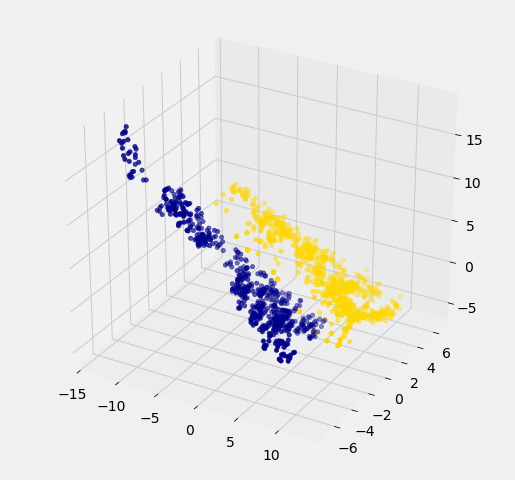

In [8]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Color'));

Awesome!  With just 2 attributes, there was some overlap between the two clusters (which means that the classifier was bound to make some mistakes for pointers in the overlap).  But when we use these 3 attributes, the two clusters have almost no overlap.  In other words, a classifier that uses these 3 attributes will be more accurate than one that only uses the 2 attributes.

This is a general phenomenom in classification.  Each attribute can potentially give you new information, so more attributes sometimes helps you build a better classifier.  Of course, the cost is that now we have to gather more information to measure the value of each attribute, but this cost may be well worth it if it significantly improves the accuracy of our classifier.

To sum up: you now know how to use $k$-nearest neighbor classification to predict the answer to a yes/no question, based on the values of some attributes, assuming you have a training set with examples where the correct prediction is known.  The general roadmap is this:

1. identify some attributes that you think might help you predict the answer to the question.
2. Gather a training set of examples where you know the values of the attributes as well as the correct prediction.
3. To make predictions in the future, measure the value of the attributes and then use $k$-nearest neighbor classification to predict the answer to the question.

### Distance in Multiple Dimensions ###
We know how to compute distance in 2-dimensional space. If we have a point at coordinates $(x_0,y_0)$ and another at $(x_1,y_1)$, the distance between them is

$$D = \sqrt{(x_0-x_1)^2 + (y_0-y_1)^2}.$$

In 3-dimensional space, the points are $(x_0, y_0, z_0)$ and $(x_1, y_1, z_1)$, and the formula for the distance between them is

$$
D = \sqrt{(x_0-x_1)^2 + (y_0-y_1)^2 + (z_0-z_1)^2}
$$

In $n$-dimensional space, things are a bit harder to visualize, but I think you can see how the formula generalized: we sum up the squares of the differences between each individual coordinate, and then take the square root of that.  

In the last section, we defined the function `distance` which returned the distance between two points. We used it in two-dimensions, but the great news is that the function doesn't care how many dimensions there are! It just subtracts the two arrays of coordinates (no matter how long the arrays are), squares the differences and adds up, and then takes the square root. To work in multiple dimensions, we don't have to change the code at all.

In [9]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

Let's use this on a [new dataset](https://archive.ics.uci.edu/ml/datasets/Wine). The table `wine` contains the chemical composition of 178 different Italian wines. The classes are the grape species, called cultivars. There are three classes but let's just see whether we can tell Class 1 apart from the other two.

In [10]:
wine = Table.read_table(path_data + 'wine.csv')

# For converting Class to binary

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))

In [11]:
wine

Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


The first two wines are both in Class 1. To find the distance between them, we first need a table of just the attributes:

In [12]:
wine_attributes = wine.drop('Class')

In [13]:
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(1)))

31.265012394048398

The last wine in the table is of Class 0. Its distance from the first wine is:

In [14]:
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(177)))

506.05936766351834

That's quite a bit bigger! Let's do some visualization to see if Class 1 really looks different from Class 0. 

In [15]:
wine_with_colors = wine.join('Class', color_table)

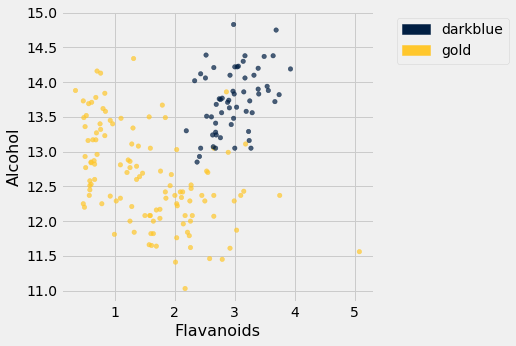

In [16]:
wine_with_colors.scatter('Flavanoids', 'Alcohol', colors='Color')

The blue points (Class 1) are almost entirely separate from the gold ones. That is one indication of why the distance between two Class 1 wines would be smaller than the distance between wines of two different classes. We can see a similar phenomenon with a different pair of attributes too:

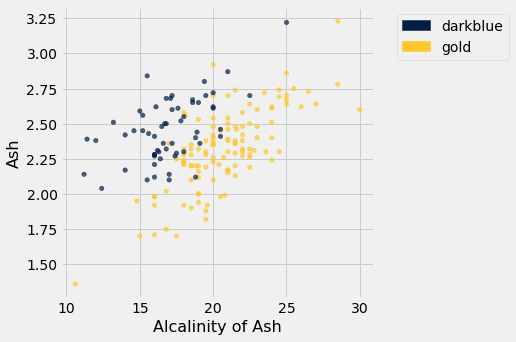

In [17]:
wine_with_colors.scatter('Alcalinity of Ash', 'Ash', colors='Color')

But for some pairs the picture is more murky.

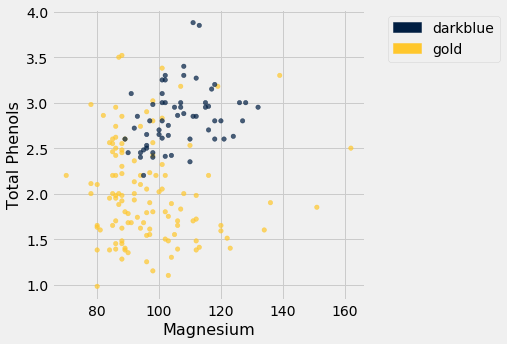

In [18]:
wine_with_colors.scatter('Magnesium', 'Total Phenols', colors='Color')

Let's see if we can implement a classifier based on all of the attributes. After that, we'll see how accurate it is.

### A Plan for the Implementation ###
It's time to write some code to implement the classifier.  The input is a `point` that we want to classify.  The classifier works by finding the $k$ nearest neighbors of `point` from the training set.  So, our approach will go like this:

1. Find the closest $k$ neighbors of `point`, i.e., the $k$ wines from the training set that are most similar to `point`.

2. Look at the classes of those $k$ neighbors, and take the majority vote to find the most-common class of wine.  Use that as our predicted class for `point`.

So that will guide the structure of our Python code.

In [19]:
def closest(training, p, k):
    ...

def majority(topkclasses):
    ...

def classify(training, p, k):
    kclosest = closest(training, p, k)
    kclosest.classes = kclosest.select('Class')
    return majority(kclosest)

### Implementation Step 1 ###
To implement the first step for the kidney disease data, we had to compute the distance from each patient in the training set to `point`, sort them by distance, and take the $k$ closest patients in the training set.  

That's what we did in the previous section with the point corresponding to Alice. Let's generalize that code. We'll redefine `distance` here, just for convenience.

In [20]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

Let's see how this works on our `wine` data. We'll just take the first wine and find its five nearest neighbors among all the wines. Remember that since this wine is part of the dataset, it is its own nearest neighbor. So we should expect to see it at the top of the list, followed by four others.

First let's extract its attributes:

In [21]:
special_wine = wine.drop('Class').row(0)

And now let's find its 5 nearest neighbors.

In [22]:
closest(wine, special_wine, 5)

Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline,Distance
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.74,1.67,2.25,16.4,118,2.6,2.9,0.21,1.62,5.85,0.92,3.2,1060,10.3928
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.3,1.25,5.24,0.87,3.33,1080,22.3407
1,14.1,2.02,2.4,18.8,103,2.75,2.92,0.32,2.38,6.2,1.07,2.75,1060,24.7602
1,14.38,3.59,2.28,16,102,3.25,3.17,0.27,2.19,4.9,1.04,3.44,1065,25.0947


Bingo! The first row is the nearest neighbor, which is itself – there's a 0 in the `Distance` column as expected. All five nearest neighbors are of Class 1, which is consistent with our earlier observation that Class 1 wines appear to be clumped together in some dimensions.

### Implementation Steps 2 and 3 ###
Next we need to take a "majority vote" of the nearest neighbors and assign our point the same class as the majority.

In [23]:
def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [24]:
classify(wine, special_wine, 5)

1

If we change `special_wine` to be the last one in the dataset, is our classifier able to tell that it's in Class 0?

In [25]:
special_wine = wine.drop('Class').row(177)
classify(wine, special_wine, 5)

0

Yes! The classifier gets this one right too.

But we don't yet know how it does with all the other wines, and in any case we know that testing on wines that are already part of the training set might be over-optimistic. In the final section of this chapter, we will separate the wines into a training and test set and then measure the accuracy of our classifier on the test set. 

## Unit20: The Accuracy of the classifier


In [26]:
import matplotlib
#matplotlib.use('Agg')
path_data = 'https://raw.githubusercontent.com/taecoding/data/master/cs61/data8assets/textbook/chapters/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [27]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [28]:
wine = Table.read_table(path_data + 'wine.csv')

# For converting Class to binary

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))

### The Accuracy of the Classifier ###
To see how well our classifier does, we might put 50% of the data into the training set and the other 50% into the test set.  Basically, we are setting aside some data for later use, so we can use it to measure the accuracy of our classifier.  We've been calling that the *test set*. Sometimes people will call the data that you set aside for testing a *hold-out set*, and they'll call this strategy for estimating accuracy the *hold-out method*.

Note that this approach requires great discipline.  Before you start applying machine learning methods, you have to take some of your data and set it aside for testing.  You must avoid using the test set for developing your classifier: you shouldn't use it to help train your classifier or tweak its settings or for brainstorming ways to improve your classifier.  Instead, you should use it only once, at the very end, after you've finalized your classifier, when you want an unbiased estimate of its accuracy.

### Measuring the Accuracy of Our Wine Classifier ###
OK, so let's apply the hold-out method to evaluate the effectiveness of the $k$-nearest neighbor classifier for identifying wines.  The data set has 178 wines, so we'll randomly permute the data set and put 89 of them in the training set and the remaining 89 in the test set.

In [29]:
shuffled_wine = wine.sample(with_replacement=False) 
training_set = shuffled_wine.take(np.arange(89))
test_set  = shuffled_wine.take(np.arange(89, 178))

We'll train the classifier using the 89 wines in the training set, and evaluate how well it performs on the test set. To make our lives easier, we'll write a function to evaluate a classifier on every wine in the test set:

In [30]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    return count_equal(c, test.column('Class')) / test.num_rows

Now for the grand reveal -- let's see how we did.  We'll arbitrarily use $k=5$.

In [31]:
evaluate_accuracy(training_set, test_set, 5)

0.9213483146067416

The accuracy rate isn't bad at all for a simple classifier.

### Breast Cancer Diagnosis ###

Now I want to do an example based on diagnosing breast cancer.  I was inspired by Brittany Wenger, who won the Google national science fair in 2012 a 17-year old high school student.  Here's Brittany:

![Brittany Wenger](http://i.huffpost.com/gen/701499/thumbs/o-GSF83-570.jpg?3)

Brittany's [science fair project](https://sites.google.com/a/googlesciencefair.com/science-fair-2012-project-64a91af142a459cfb486ed5cb05f803b2eb41354-1333130785-87/home) was to build a classification algorithm to diagnose breast cancer.  She won grand prize for building an algorithm whose accuracy was almost 99%. 

Let's see how well we can do, with the ideas we've learned in this course.

So, let me tell you a little bit about the data set.  Basically, if a woman has a lump in her breast, the doctors may want to take a biopsy to see if it is cancerous.  There are several different procedures for doing that.  Brittany focused on fine needle aspiration (FNA), because it is less invasive than the alternatives.  The doctor gets a sample of the mass, puts it under a microscope, takes a picture, and a trained lab tech analyzes the picture to determine whether it is cancer or not.  We get a picture like one of the following:

![benign](https://www.inferentialthinking.com/images/benign.png)

![cancer](https://www.inferentialthinking.com/images/malignant.png)

Unfortunately, distinguishing between benign vs malignant can be tricky.  So, researchers have studied the use of machine learning to help with this task.  The idea is that we'll ask the lab tech to analyze the image and compute various attributes: things like the typical size of a cell, how much variation there is among the cell sizes, and so on.  Then, we'll try to use this information to predict (classify) whether the sample is malignant or not.  We have a training set of past samples from women where the correct diagnosis is known, and we'll hope that our machine learning algorithm can use those to learn how to predict the diagnosis for future samples.

We end up with the following data set.  For the "Class" column, 1 means malignant (cancer); 0 means benign (not cancer).

In [32]:
patients = Table.read_table(path_data + 'breast-cancer.csv').drop('ID')
patients

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0
8,10,10,8,7,10,9,7,1,1
1,1,1,1,2,10,3,1,1,0
2,1,2,1,2,1,3,1,1,0
2,1,1,1,2,1,1,1,5,0
4,2,1,1,2,1,2,1,1,0


So we have 9 different attributes.  I don't know how to make a 9-dimensional scatterplot of all of them, so I'm going to pick two and plot them:

In [33]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
patients_with_colors = patients.join('Class', color_table)

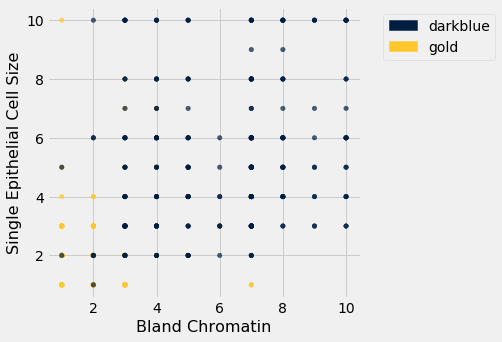

In [34]:
patients_with_colors.scatter('Bland Chromatin', 'Single Epithelial Cell Size', colors='Color')

Oops.  That plot is utterly misleading, because there are a bunch of points that have identical values for both the x- and y-coordinates.  To make it easier to see all the data points, I'm going to add a little bit of random jitter to the x- and y-values.  Here's how that looks:

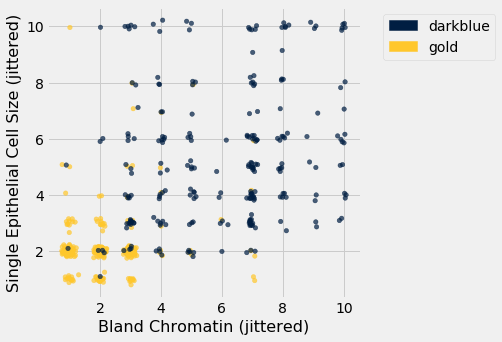

In [35]:

def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))
Table().with_columns(
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class', patients.column('Class')
    ).join('Class', color_table).scatter(1, 2, colors='Color')

For instance, you can see there are lots of samples with chromatin = 2 and epithelial cell size = 2; all non-cancerous.

Keep in mind that the jittering is just for visualization purposes, to make it easier to get a feeling for the data.  We're ready to work with the data now, and we'll use the original (unjittered) data.

First we'll create a training set and a test set. The data set has 683 patients, so we'll randomly permute the data set and put 342 of them in the training set and the remaining 341 in the test set.

In [36]:
shuffled_patients = patients.sample(683, with_replacement=False) 
training_set = shuffled_patients.take(np.arange(342))
test_set  = shuffled_patients.take(np.arange(342, 683))

Let's stick with 5 nearest neighbors, and see how well our classifier does.

In [37]:
evaluate_accuracy(training_set, test_set, 5)

0.9618768328445748

Over 96% accuracy.  Not bad!  Once again, pretty darn good for such a simple technique.

As a footnote, you might have noticed that Brittany Wenger did even better.  What techniques did she use? One key innovation is that she incorporated a confidence score into her results: her algorithm had a way to determine when it was not able to make a confident prediction, and for those patients, it didn't even try to predict their diagnosis.  Her algorithm was 99% accurate on the patients where it made a prediction -- so that extension seemed to help quite a bit.

## Unit21: Multiple Regression

In [41]:
from datascience import *
path_data = 'https://raw.githubusercontent.com/taecoding/data/master/cs61/data8assets/textbook/chapters/'
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

np.set_printoptions(suppress=True)

In [42]:

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

Now that we have explored ways to use multiple attributes to predict a categorical variable, let us return to predicting a quantitative variable. Predicting a numerical quantity is called regression, and a commonly used method to use multiple attributes for regression is called *multiple linear regression*.

### Home Prices

The following dataset of house prices and attributes was collected over several years for the city of Ames, Iowa. A [description of the dataset appears online](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf). We will focus only a subset of the columns. We will try to predict the sale price column from the other columns.

In [43]:
all_sales = Table.read_table(path_data + 'house.csv')
sales = all_sales.where('Bldg Type', '1Fam').where('Sale Condition', 'Normal').select(
    'SalePrice', '1st Flr SF', '2nd Flr SF', 
    'Total Bsmt SF', 'Garage Area', 
    'Wood Deck SF', 'Open Porch SF', 'Lot Area', 
    'Year Built', 'Yr Sold')
sales.sort('SalePrice')

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
35000,498,0,498,216,0,0,8088,1922,2006
39300,334,0,0,0,0,0,5000,1946,2007
40000,649,668,649,250,0,54,8500,1920,2008
45000,612,0,0,308,0,0,5925,1940,2009
52000,729,0,270,0,0,0,4130,1935,2008
52500,693,0,693,0,0,20,4118,1941,2006
55000,723,363,723,400,0,24,11340,1920,2008
55000,796,0,796,0,0,0,3636,1922,2008
57625,810,0,0,280,119,24,21780,1910,2009
58500,864,0,864,200,0,0,8212,1914,2010


A histogram of sale prices shows a large amount of variability and a distribution that is clearly not normal. A long tail to the right contains a few houses that had very high prices. The short left tail does not contain any houses that sold for less than $35,000.

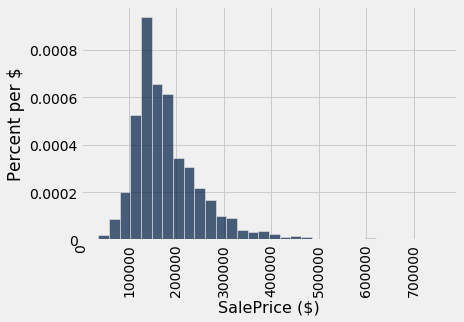

In [44]:
sales.hist('SalePrice', bins=32, unit='$')

#### Correlation

No single attribute is sufficient to predict the sale price. For example, the area of first floor, measured in square feet, correlates with sale price but only explains some of its variability.

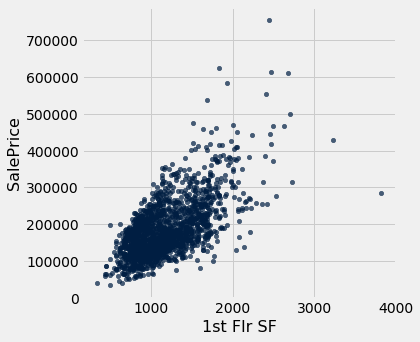

In [45]:
sales.scatter('1st Flr SF', 'SalePrice')

In [46]:
correlation(sales, 'SalePrice', '1st Flr SF')

0.6424662541030225

In fact, none of the individual attributes have a correlation with sale price that is above 0.7 (except for the sale price itself).

In [47]:
for label in sales.labels:
    print('Correlation of', label, 'and SalePrice:\t', correlation(sales, label, 'SalePrice'))

Correlation of SalePrice and SalePrice:	 1.0
Correlation of 1st Flr SF and SalePrice:	 0.6424662541030225
Correlation of 2nd Flr SF and SalePrice:	 0.3575218942800824
Correlation of Total Bsmt SF and SalePrice:	 0.652978626757169
Correlation of Garage Area and SalePrice:	 0.6385944852520443
Correlation of Wood Deck SF and SalePrice:	 0.3526986661950492
Correlation of Open Porch SF and SalePrice:	 0.3369094170263733
Correlation of Lot Area and SalePrice:	 0.2908234551157694
Correlation of Year Built and SalePrice:	 0.5651647537135916
Correlation of Yr Sold and SalePrice:	 0.02594857908072111


However, combining attributes can provide higher correlation. In particular, if we sum the first floor and second floor areas, the result has a higher correlation than any single attribute alone.

In [48]:
both_floors = sales.column(1) + sales.column(2)
correlation(sales.with_column('Both Floors', both_floors), 'SalePrice', 'Both Floors')

0.7821920556134877

This high correlation indicates that we should try to use more than one attribute to predict the sale price. In a dataset with multiple observed attributes and a single numerical value to be predicted (the sale price in this case), multiple linear regression can be an effective technique.

### Multiple Linear Regression 

In multiple linear regression, a numerical output is predicted from numerical input attributes by multiplying each attribute value by a different slope, then summing the results. In this example, the slope for the `1st Flr SF` would represent the dollars per square foot of area on the first floor of the house that should be used in our prediction. 

Before we begin prediction, we split our data randomly into a training and test set of equal size.

In [49]:
train, test = sales.split(1001)
print(train.num_rows, 'training and', test.num_rows, 'test instances.')

1001 training and 1001 test instances.


The slopes in multiple regression is an array that has one slope value for each attribute in an example. Predicting the sale price involves multiplying each attribute by the slope and summing the result.

In [50]:
def predict(slopes, row):
    return sum(slopes * np.array(row))

example_row = test.drop('SalePrice').row(0)
print('Predicting sale price for:', example_row)
example_slopes = np.random.normal(10, 1, len(example_row))
print('Using slopes:', example_slopes)
print('Result:', predict(example_slopes, example_row))

Predicting sale price for: Row(1st Flr SF=738, 2nd Flr SF=738, Total Bsmt SF=738.0, Garage Area=540.0, Wood Deck SF=100, Open Porch SF=35, Lot Area=8633, Year Built=2005, Yr Sold=2009)
Using slopes: [ 9.42899886  8.99447964  9.43288554 12.66832523  8.87013926 10.28919176
 10.33737129 11.25286502 11.64132123]
Result: 163837.9630172082


The result is an estimated sale price, which can be compared to the actual sale price to assess whether the slopes provide accurate predictions. Since the `example_slopes` above were chosen at random, we should not expect them to provide accurate predictions at all.

In [51]:
print('Actual sale price:', test.column('SalePrice').item(0))
print('Predicted sale price using random slopes:', predict(example_slopes, example_row))

Actual sale price: 173500
Predicted sale price using random slopes: 163837.9630172082


#### Least Squares Regression

The next step in performing multiple regression is to define the least squares objective. We perform the prediction for each row in the training set, and then compute the root mean squared error (RMSE) of the predictions from the actual prices.

In [53]:
train_prices = train.column(0)
train_attributes = train.drop(0)

def rmse(slopes, attributes, prices):
    errors = []
    for i in np.arange(len(prices)):
        predicted = predict(slopes, attributes.row(i))
        actual = prices.item(i)
        errors.append((predicted - actual) ** 2)
    return np.mean(errors) ** 0.5

def rmse_train(slopes):
    return rmse(slopes, train_attributes, train_prices)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes))

RMSE of all training examples using random slopes: 64098.86583328862


Finally, we use the `minimize` function to find the slopes with the lowest RMSE. Since the function we want to minimize, `rmse_train`, takes an array instead of a number, we must pass the `array=True` argument to `minimize`. When this argument is used, `minimize` also requires an initial guess of the slopes so that it knows the dimension of the input array. Finally, to speed up optimization, we indicate that `rmse_train` is a smooth function using the `smooth=True` attribute. Computation of the best slopes may take several minutes.

In [54]:
best_slopes = minimize(rmse_train, start=example_slopes, smooth=True, array=True)
print('The best slopes for the training set:')
Table(train_attributes.labels).with_row(list(best_slopes)).show()
print('RMSE of all training examples using the best slopes:', rmse_train(best_slopes))

The best slopes for the training set:


1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
71.0431,75.209,41.312,48.2152,37.0104,13.8585,1.00911,565.53,-558.498


RMSE of all training examples using the best slopes: 29750.3637306838


#### Interpreting Multiple Regression 

Let's interpret these results. The best slopes give us a method for estimating the price of a house from its attributes. A square foot of area on the first floor is worth about \$75 (the first slope), while one on the second floor is worth about \$70 (the second slope). The final negative value describes the market: prices in later years were lower on average.

The RMSE of around \$30,000 means that our best linear prediction of the sale price based on all of the attributes is off by around \$30,000 on the training set, on average.  We find a similar error when predicting prices on the test set, which indicates that our prediction method will generalize to other samples from the same population.

In [55]:
test_prices = test.column(0)
test_attributes = test.drop(0)

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_prices)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 32987.260025599935


If the predictions were perfect, then a scatter plot of the predicted and actual values would be a straight line with slope 1. We see that most dots fall near that line, but there is some error in the predictions.

In [58]:
from datascience import *
#Table.scatter?

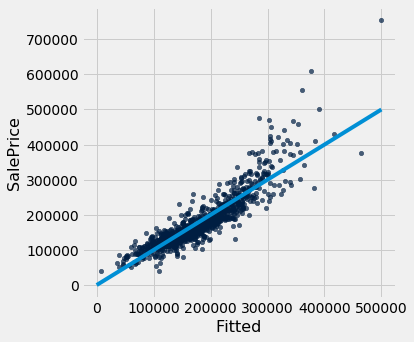

In [59]:
def fit(row):
    return sum(best_slopes * np.array(row))

test.with_column('Fitted', test.drop(0).apply(fit)).scatter('Fitted', 0)
plots.plot([0, 5e5], [0, 5e5]);

A residual plot for multiple regression typically compares the errors (residuals) to the actual values of the predicted variable. We see in the residual plot below that we have systematically underestimated the value of expensive houses, shown by the many positive residual values on the right side of the graph.

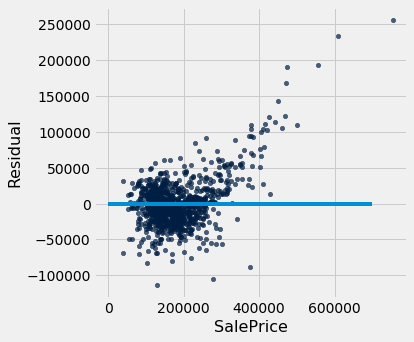

In [60]:
test.with_column('Residual', test_prices-test.drop(0).apply(fit)).scatter(0, 'Residual')
plots.plot([0, 7e5], [0, 0]);

As with simple linear regression, interpreting the result of a predictor is at least as important as making predictions. There are many lessons about interpreting multiple regression that are not included in this textbook. A natural next step after completing this text would be to study linear modeling and regression in further depth.

### Nearest Neighbors for Regression

Another approach to predicting the sale price of a house is to use the price of similar houses. This *nearest neighbor* approach is very similar to our classifier. To speed up computation, we will only use the attributes that had the highest correlation with the sale price in our original analysis.

In [61]:
train_nn = train.select(0, 1, 2, 3, 4, 8)
test_nn = test.select(0, 1, 2, 3, 4, 8)
train_nn.show(3)

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Year Built
149900,833,0,833,495,1984
159950,1086,0,1024,484,1966
247000,1460,0,1460,480,2006


The computation of closest neighbors is identical to a nearest-neighbor classifier. In this case, we will exclude the `'SalePrice'` rather than the `'Class'` column from the distance computation. The five nearest neighbors of the first test row are shown below.

In [62]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    return np.sqrt(sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2))

def distances(training, example, output):
    """Compute the distance from example for each row in training."""
    dists = []
    attributes = training.drop(output)
    for row in attributes.rows:
        dists.append(row_distance(row, example))
    return training.with_column('Distance', dists)

def closest(training, example, k, output):
    """Return a table of the k closest neighbors to example."""
    return distances(training, example, output).sort('Distance').take(np.arange(k))

example_nn_row = test_nn.drop(0).row(0)
closest(train_nn, example_nn_row, 5, 'SalePrice')

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Year Built,Distance
176000,725,754,725,484,1981,65.6201
184000,725,754,725,484,1972,69.419
163000,720,720,720,480,1968,77.0779
157500,720,720,720,480,1964,79.0759
162000,735,660,723,497,1972,96.2081


One simple method for predicting the price is to average the prices of the nearest neighbors.

In [63]:
def predict_nn(example):
    """Return the majority class among the k nearest neighbors."""
    return np.average(closest(train_nn, example, 5, 'SalePrice').column('SalePrice'))

predict_nn(example_nn_row)

168500.0

Finally, we can inspect whether our prediction is close to the true sale price for our one test example. Looks reasonable!

In [64]:
print('Actual sale price:', test_nn.column('SalePrice').item(0))
print('Predicted sale price using nearest neighbors:', predict_nn(example_nn_row))

Actual sale price: 173500
Predicted sale price using nearest neighbors: 168500.0


#### Evaluation

To evaluate the performance of this approach for the whole test set, we apply `predict_nn` to each test example, then compute the root mean squared error of the predictions. Computation of the predictions may take several minutes.

In [65]:
nn_test_predictions = test_nn.drop('SalePrice').apply(predict_nn)
rmse_nn = np.mean((test_prices - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for multiple linear regression: ', rmse_linear)
print('Test set RMSE for nearest neighbor regression:', rmse_nn)

Test set RMSE for multiple linear regression:  32987.260025599935
Test set RMSE for nearest neighbor regression: 33574.03494802835


For these data, the errors of the two techniques are quite similar! For different data sets, one technique might outperform another. By computing the RMSE of both techniques on the same data, we can compare methods fairly. One note of caution: the difference in performance might not be due to the technique at all; it might be due to the random variation due to sampling the training and test sets in the first place.

Finally, we can draw a residual plot for these predictions. We still underestimate the prices of the most expensive houses, but the bias does not appear to be as systematic. However, fewer residuals are very close to zero, indicating that fewer prices were predicted with very high accuracy. 

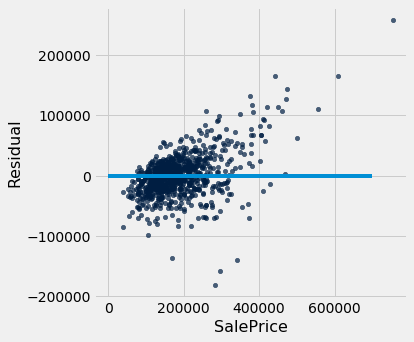

In [66]:
test.with_column('Residual', test_prices-nn_test_predictions).scatter(0, 'Residual')
plots.plot([0, 7e5], [0, 0]);